In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd 

# 1. Feladat

In [2]:
# 1. feladat
# == értékek felvitele ==
Név = 'Kiss Bendegúz Barnabás'
Neptun_kód = 'LKYEOR'
randint = 42

# == a neptunkód ellenőrzése ==
if len(Neptun_kód) != 6 or Neptun_kód.upper() != Neptun_kód: #6tagú?, nagybetűvel írt?
    print(f'A {Neptun_kód} Helytelen Neptun kód! A Neptun kódnak 6 karakterből kell állnia és végig nagybetűnek kell lennie!')
else:
    print(f'A {Neptun_kód} Neptun kód megfelelő!')

# == a stringek felbontása ==
list_Név = list(Név)
list_Neptun_kód = list(Neptun_kód)

# == feladat által közölt módosítások ==
del list_Név[3]
del list_Neptun_kód[-1]
list_Neptun_kód.append(list_Név[-1])

# == a dict létrehozása az ord() függvénnyel ==
l1 = list_Neptun_kód + list_Név
dict = {f'{i}': ord(i) for i in l1}

# == a dict módosítása indexelés alapján ==
for i, key in enumerate(dict):
    #print(i,  key) # az i -> indexeket jelöli, addig a key -> a dict "tagjait"
    if i % 2 == 0: 
        dict[key] += randint
    else:
        dict[key] -= randint


# == a generált szám -> összeadjuk a dict összes value-át ==
generated_number = 0
for i in dict:
    generated_number += dict[i]

print(f'\nNév: {Név} \nNeptun kód: {Neptun_kód} \nGenerált szám: {generated_number}')




A LKYEOR Neptun kód megfelelő!

Név: Kiss Bendegúz Barnabás 
Neptun kód: LKYEOR 
Generált szám: 2068


# 2. Feladat
## 2.1-2. 
- 2.1 A random state-t a generated_number fogja megadni, ez lesz a random választásnak a seedje, tehát így a random választás reprodukálható lesz az adott generált számmal. 

In [3]:
# 2. feladat
data_vegyesz = pd.read_csv('hf_data_vegyesz.csv')
sampled_data = data_vegyesz.sample(n=2000, random_state=generated_number) # a random statet a feladatban generált random számra állítottam


temp = data_vegyesz.drop(sampled_data.index) # a temp az a dataframe ahol nincs ugyanolyan indexű elem, mint a sampled_data és a data_vegyeszben
temp1 = temp.head(20) # az első 20 sort töltöm be a temp1-be
sampled_data = pd.concat([sampled_data,temp1]) # konkatálása a két dataframe-nek a sampled_data-ra

print(f'{len(sampled_data.index)-len(temp1.index)} Random mintavétel a sokaságból és ehhez a kezdeti adatból első {len(temp1.index)}-at adtunk')

display(sampled_data) # a sampled_data dataframe kiíratása

2000 Random mintavétel a sokaságból és ehhez a kezdeti adatból első 20-at adtunk


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3114,67032,Male,42.0,0,0,No,Govt_job,Urban,NaN,28.7,NaN,0
4891,18636,Female,26.0,0,0,Yes,Govt_job,Urban,72.56,35.4,never smoked,0
4504,46048,Male,60.0,0,0,Yes,Govt_job,Rural,203.27,29.7,never smoked,0
5072,71957,Female,35.0,0,0,Yes,Private,Rural,58.72,40.0,smokes,0
3513,67411,Male,29.0,0,0,No,Private,Rural,105.73,28.2,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
24,4219,Male,71.0,0,0,Yes,Private,Urban,102.87,27.2,formerly smoked,1
25,70822,Male,80.0,0,0,Yes,Self-employed,Rural,104.12,23.5,never smoked,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,NaN,1
28,54827,Male,69.0,0,1,Yes,Self-employed,Urban,195.23,28.3,smokes,1


## 2.3
- 2.3.1 Ki irattam, hogy mennyi fajta egyedi érték tartozik egy oszlophoz
- 2.3.2 Választani kell 2 olyan oszlopot, amit ktagóriába kéne sorolni -> ilyen szempontból akkor akár 3-at is lehetne választani. <br> Ez a három a : "hypertension", "herat-disease" és maga az eredmény "stroke", de mivel nem intuitív, hogy az eredményt is kategorizáljam ezért azt kihagytam. 

In [4]:
print(f'Mennyi sora és oszlopa van az adathalmaznak? \nSorok száma:{len(sampled_data.index)} \nOszlopok száma: {len(sampled_data.columns)}\n')

# Egyedi értékek számlálása minden oszlopban
unique_counts = sampled_data.nunique().sort_values()

# Megjelenítés táblázatos formában
unique_counts_df = pd.DataFrame({
    "Oszlopnév": unique_counts.index,
    "Egyedi értékek száma": unique_counts.values
})

print(unique_counts_df)
#ahol több mint 10 egyedi érték van azt számmal mért értéknek vesszük
számmal_mért_oszlopok = 0
minőségi_oszlopok = 0
for i in unique_counts.values:
    if i > 10:
        számmal_mért_oszlopok += 1
    else:
        minőségi_oszlopok += 1
print(f'Ennyi számmal mért oszlop van: {számmal_mért_oszlopok}')
print(f'Ennyi minőségi osztályozó oszlop van: {minőségi_oszlopok}\n')

# -- A hypertension és heart_disease oszlopok egyedi értékeit átalakítom yes/no-ra --
Changed_columns = ['hypertension', 'heart_disease']
for column in Changed_columns:
    sampled_data[column] = sampled_data[column].map({1: 'Yes', 0: 'No'}) #.map(), vagy .replace()

print(f'A {Changed_columns} oszlopokban a 0 és 1es értékek konvertálása: ...')
# -- Ellenőrzés, hogy nem akadt be esetleg egy nem 0, vagy 1 szám
if sampled_data[Changed_columns].isin(['Yes', 'No']).all().all():
    print('A konvertálás sikeres volt!')
if sampled_data[Changed_columns].isna().any().any():
    print('Nem mindenhol volt sikeres a konvertálás, ott NaN értékek vannak!')


Mennyi sora és oszlopa van az adathalmaznak? 
Sorok száma:2020 
Oszlopok száma: 12

            Oszlopnév  Egyedi értékek száma
0              gender                     2
1        hypertension                     2
2        ever_married                     2
3       heart_disease                     2
4      Residence_type                     2
5              stroke                     2
6      smoking_status                     3
7           work_type                     5
8                 age                    98
9                 bmi                   351
10  avg_glucose_level                  1667
11                 id                  2020
Ennyi számmal mért oszlop van: 4
Ennyi minőségi osztályozó oszlop van: 8

A ['hypertension', 'heart_disease'] oszlopokban a 0 és 1es értékek konvertálása: ...
A konvertálás sikeres volt!


## 2.4 NaN értékek megtalálása
- Melyik oszlopban és mennyi?, ábrázolás stb. 

Az össze Nan a halmazban: 893
NaN értékek oszloponkénti eloszlása:
bmi: 83
avg_glucose_level: 202
smoking_status: 608


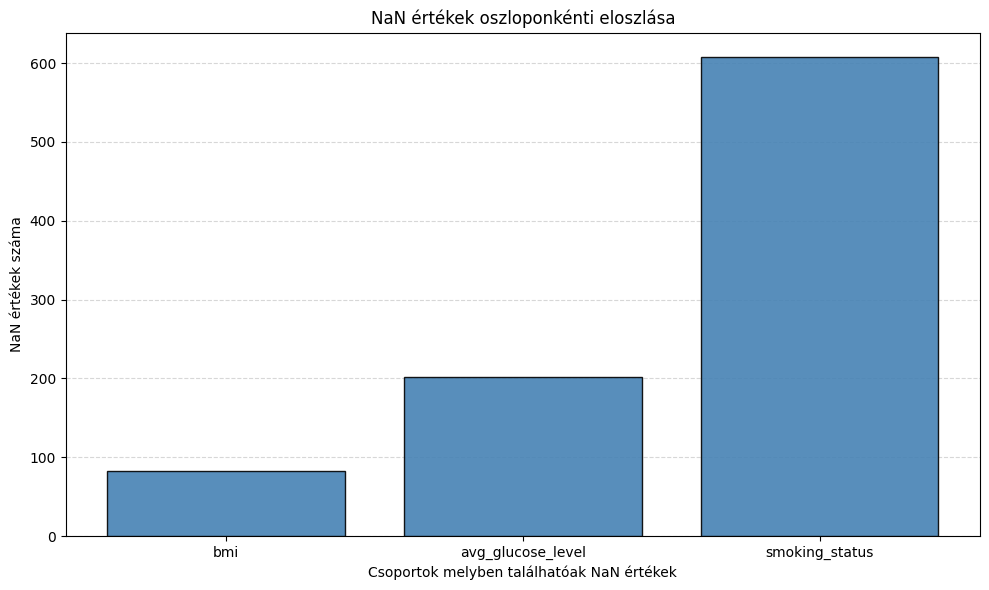

In [22]:
összes_nan = sampled_data.isna().sum().sum() # az összes NaN érték
print(f'Az össze Nan a halmazban: {összes_nan}')

nan_counts = sampled_data.isna().sum()
nan_counts = nan_counts[nan_counts > 0].sort_values()

print('NaN értékek oszloponkénti eloszlása:')
for i in nan_counts.index:
    print(f'{i}: {nan_counts[i]}')

plt.figure(figsize=(10, 6))
plt.bar(nan_counts.index, nan_counts.values, color='steelblue', edgecolor='black', zorder = 3, alpha=0.9)
plt.ylabel('NaN értékek száma')
plt.xlabel('Csoportok melyben találhatóak NaN értékek')
plt.title('NaN értékek oszloponkénti eloszlása')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5, zorder=0)   # grid legalul  
plt.show()



## 2.5 feladat
- Egyes adott agekhez mennyi sor tartozik? -> hisztogrammon kell ezt ábrázolni
### 2.5.1
- hisztogrammot kell csinálni <br> kategóriák: munka, <br> érték: életkor, <br> hol kell ezt vizsgálni: ahol strokeot kaptak, <br> Következetesen akkor 3 különböző hisztogrammot kell készíteni

age
82.00    29
81.00    30
80.00    29
79.00    35
78.00    54
         ..
0.56      2
0.40      1
0.32      3
0.24      2
0.16      1
Name: count, Length: 98, dtype: int64


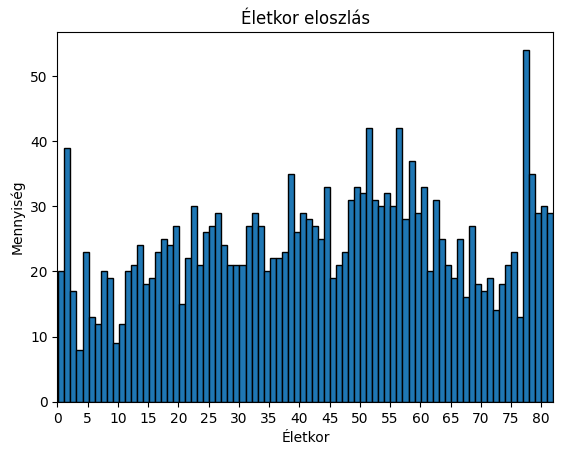

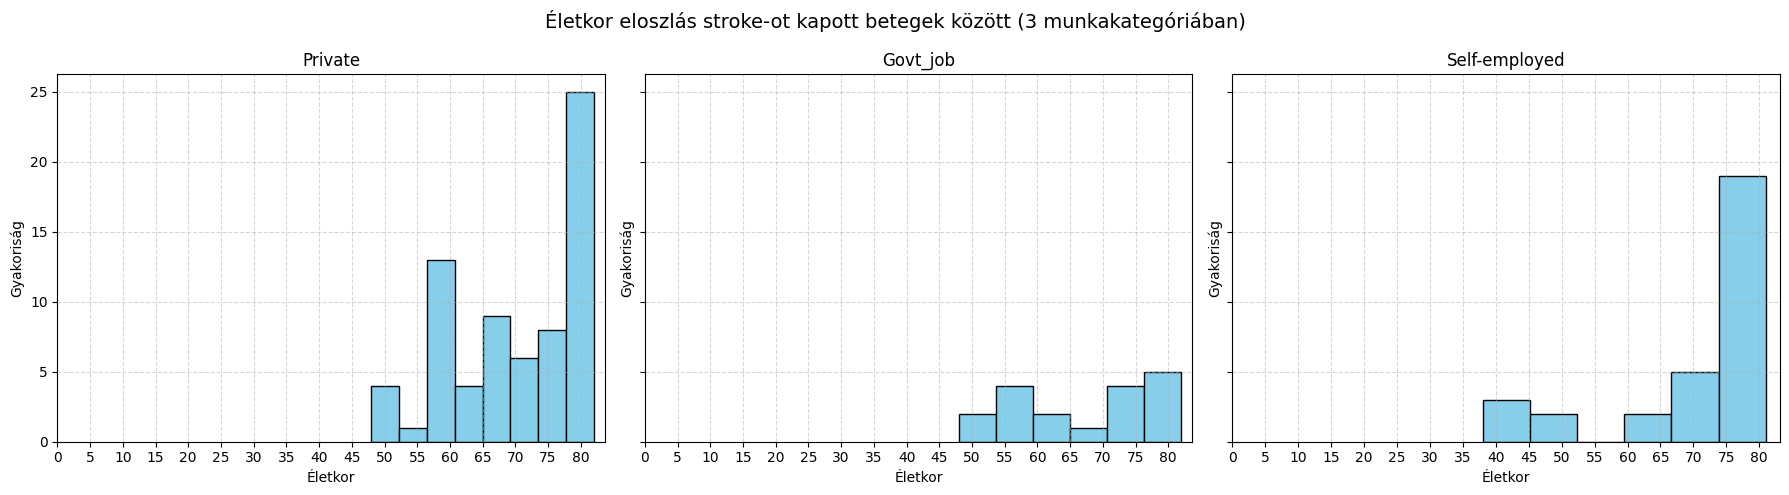

In [23]:
egyes_életkorok = sampled_data['age'].value_counts().sort_index(ascending=False)
print(egyes_életkorok)

# Hisztogram ábrázolása
sampled_data['age'].plot(
    kind='hist',
    bins=int(max(sampled_data['age'])), 
    ylabel='Mennyiség',
    title='Életkor eloszlás',
    xlabel='Életkor',
    edgecolor='black'
)

plt.xticks(np.arange(0, max(sampled_data['age']), 5)) 
plt.xlim(0, max(sampled_data['age']))  
plt.show()

stroke_filter = sampled_data[sampled_data['stroke'] == 1]
work_type_list = stroke_filter['work_type'].unique()

for i in range(len(work_type_list)):
    if work_type_list[i] == 'children':
        work_type_list = np.delete(work_type_list, i)


# 3. Ábra létrehozása
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, kategoria in enumerate(work_type_list):
    adat = stroke_filter[stroke_filter['work_type'] == kategoria]
    axs[i].hist(adat['age'].dropna(), bins='auto', edgecolor='black', color='skyblue') # Itt a bins = 'auto', ami azt jelenti hogy a csoportok ábrázolása automatikus, ami pontatlan, hogyan lehetne ezt kicserélni egy konkrélt értékkel? 
    axs[i].set_title(f'{kategoria}')
    axs[i].set_xlabel('Életkor')
    axs[i].set_ylabel('Gyakoriság')
    axs[i].set_xticks(np.arange(0, max(stroke_filter['age']), 5))
    axs[i].grid(True, linestyle='--', alpha=0.5)

fig.suptitle(f'Életkor eloszlás stroke-ot kapott betegek között ({len(work_type_list)} munkakategóriában)', fontsize=14)
plt.tight_layout()
plt.show()


## 2.6 feladat
- 2.6.1 A KDE-t nem sikerült előállítani

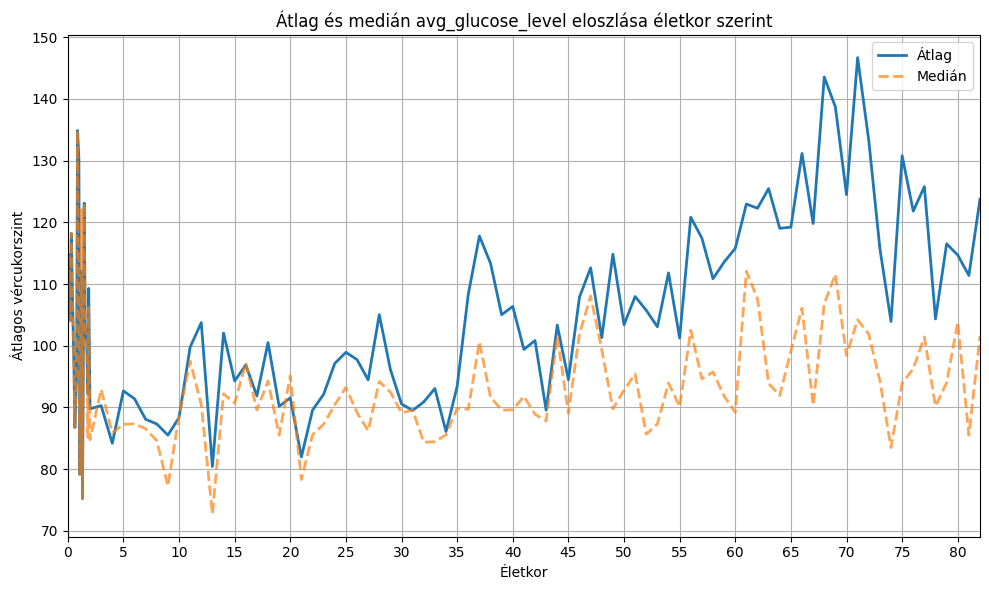

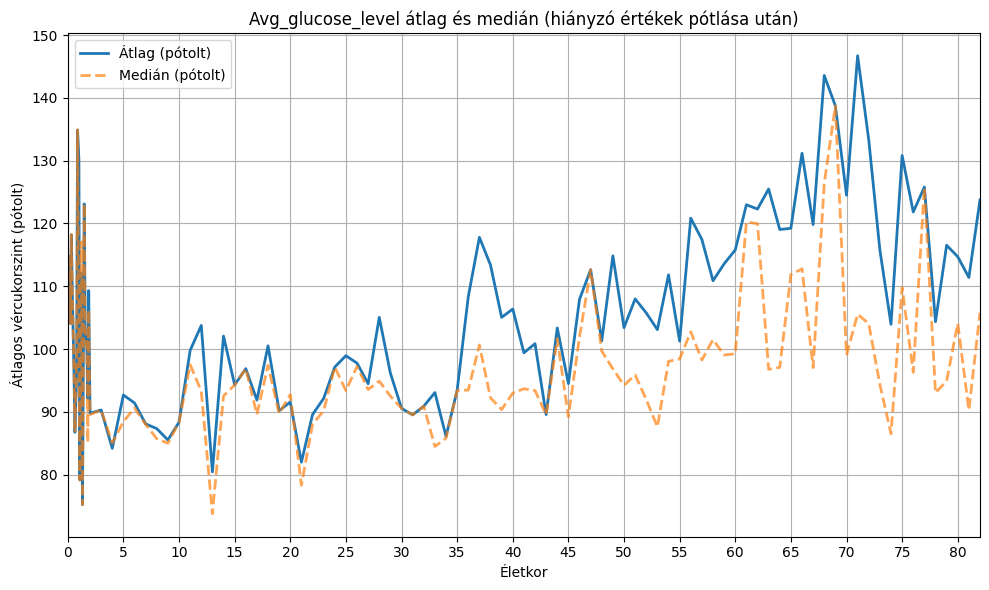

In [24]:
df = sampled_data[['age','avg_glucose_level']]
grouped = df.groupby('age')['avg_glucose_level']
átlag = grouped.mean()
medián = grouped.median()

plt.figure(figsize=(10, 6))
plt.plot(átlag.index, átlag.values, label='Átlag', linewidth=2)
plt.plot(medián.index, medián.values, label='Medián', linewidth=2, linestyle='--', alpha=0.7)

plt.xlabel('Életkor')
plt.ylabel('Átlagos vércukorszint')
plt.xticks(np.arange(0, max(sampled_data['age']), 5))
plt.xlim(0, max(sampled_data['age']))
plt.title('Átlag és medián avg_glucose_level eloszlása életkor szerint')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Hiányzó értékek pótlása az adott életkori átlaggal
df_filled = sampled_data.copy()
for index, row in df_filled.iterrows():
    if pd.isna(row['avg_glucose_level']):
        df_filled.at[index, 'avg_glucose_level'] = átlag[row['age']]

# 3. Újra csoportosítás és számítás
df_grouped_filled = df_filled.groupby('age')['avg_glucose_level']
átlag_filled = df_grouped_filled.mean()
medián_filled = df_grouped_filled.median()

# 4. Ábra
plt.figure(figsize=(10, 6))
plt.plot(átlag_filled.index, átlag_filled.values, label='Átlag (pótolt)', linewidth=2)
plt.plot(medián_filled.index, medián_filled.values, label='Medián (pótolt)', linewidth=2, linestyle='--', alpha=0.7)

plt.xlabel('Életkor')
plt.ylabel('Átlagos vércukorszint (pótolt)')
plt.title('Avg_glucose_level átlag és medián (hiányzó értékek pótlása után)')
plt.xticks(np.arange(0, max(sampled_data['age']), 5))
plt.xlim(0, max(sampled_data['age']))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## 2.7 feladat
- Mi az a KDE?

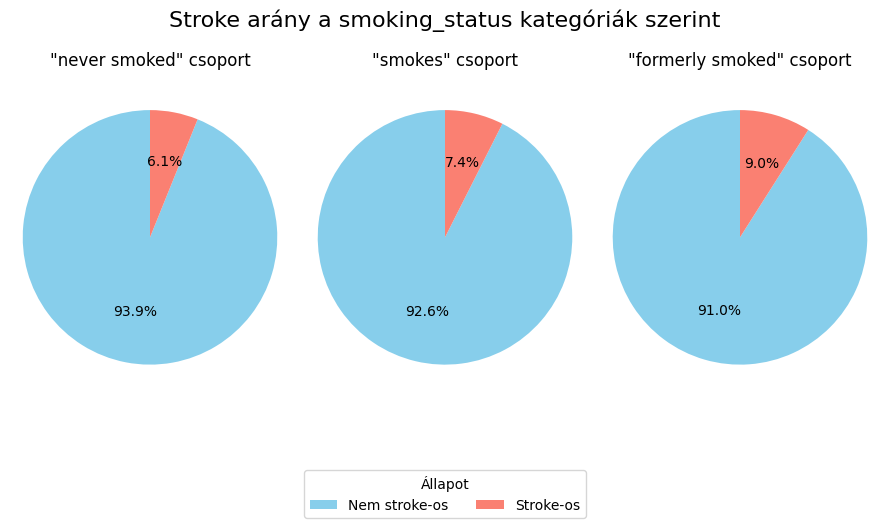

In [25]:
# Beállítások
stroke_labels = ['Nem stroke-os', 'Stroke-os']
stroke_colors = ['skyblue', 'salmon']
stroke_map = {0: 'Nem stroke-os', 1: 'Stroke-os'}

# Szűrés
valid_smoke_data = sampled_data.dropna(subset=['smoking_status'])
kategoriak = valid_smoke_data['smoking_status'].unique()
n = len(kategoriak)

# Ábra: subplot elrendezés
fig, axs = plt.subplots(1, n, figsize=(3 * n, 5))

for i, status in enumerate(kategoriak):
    subset = valid_smoke_data[valid_smoke_data['smoking_status'] == status]
    stroke_számok = subset['stroke'].value_counts(normalize=True).sort_index() * 100
    values = [stroke_számok.get(0, 0), stroke_számok.get(1, 0)]

    wedges, texts, autotexts = axs[i].pie(
        values,
        autopct='%1.1f%%',
        startangle=90,
        colors=stroke_colors
    )
    axs[i].set_title(f'"{status}" csoport')
    axs[i].axis('equal')

# Közös jelmagyarázat a teljes ábrához
fig.legend(
    wedges, stroke_labels,
    title="Állapot",
    loc='lower center',
    ncol=2,
    bbox_to_anchor=(0.5, -0.05)
)

fig.suptitle('Stroke arány a smoking_status kategóriák szerint', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # hogy elférjen a legend
plt.show()


# 2.8 feladat

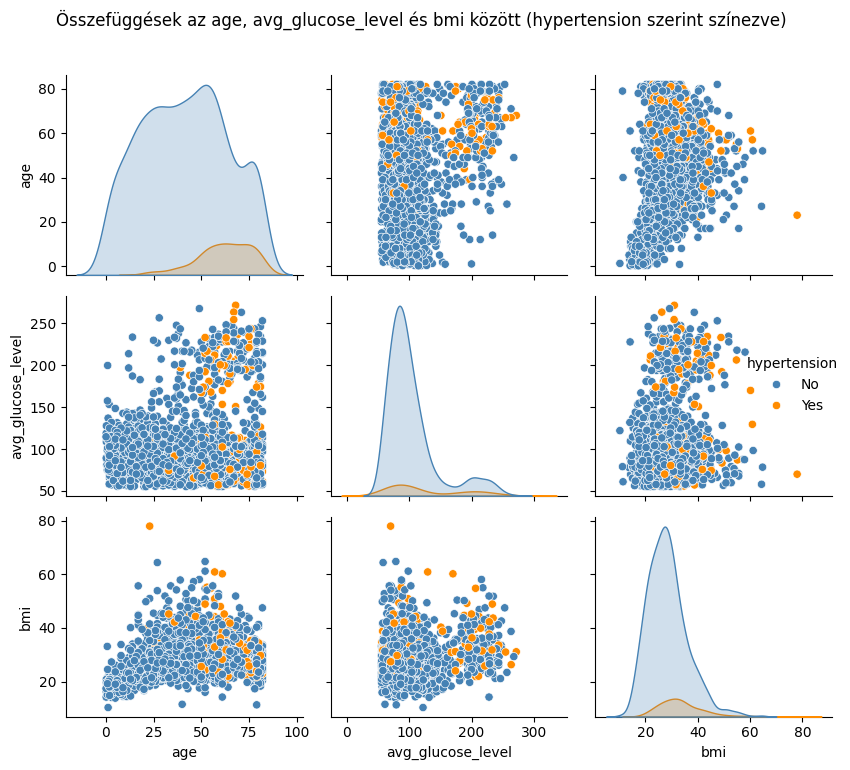

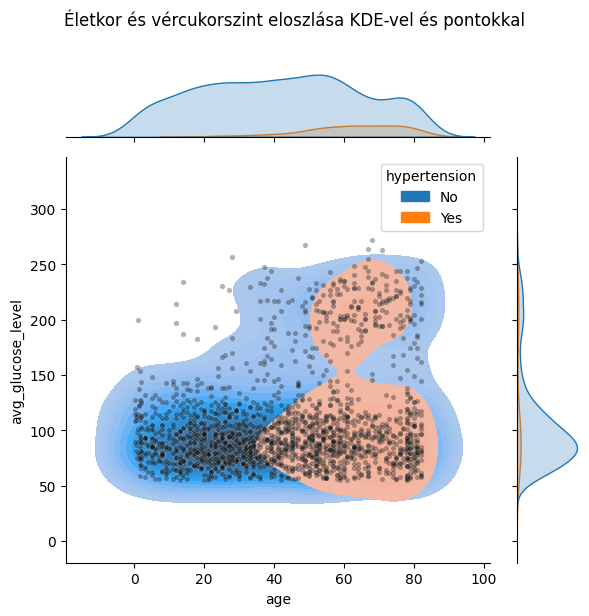

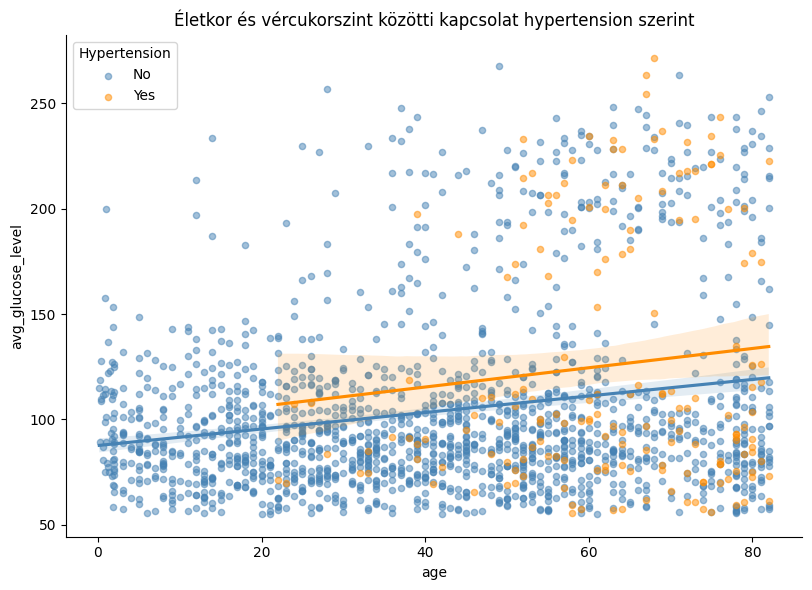

In [26]:
# 1. Csak a szükséges oszlopok
df_pair = sampled_data[['age', 'avg_glucose_level', 'bmi', 'hypertension']].dropna()  # Eldobjuk a hiányzókat

# 2. Pairplot készítése
sns.pairplot(df_pair, hue='hypertension', diag_kind='kde', palette={'No': 'steelblue', 'Yes': 'darkorange'})

# 3. Cím hozzáadása
plt.suptitle('Összefüggések az age, avg_glucose_level és bmi között (hypertension szerint színezve)', y=1.02)
plt.tight_layout()
plt.show()

# Csak a két oszlop és eldobjuk a NaN-okat
df_scatter = sampled_data[['age', 'avg_glucose_level', 'hypertension']].dropna()

# jointplot: KDE + scatter egyszerre
sns.jointplot(
    data=df_scatter,
    hue='hypertension',
    x='age',
    y='avg_glucose_level',
    kind='kde',         # ez adja a KDE-sűrűségi kontúrokat
    fill=True,
    thresh=0.05,        # küszöb – mit rajzoljon ki
    levels=20,           # több szint, részletesebb kontúrok # színezés a hypertension szerint
)

# Utána scatter külön hozzá (mert a kind='kde' nem tartalmaz pontokat)
sns.scatterplot(
    data=df_scatter,
    x='age',
    y='avg_glucose_level',
    s=15,
    color='black',
    alpha=0.3
)

plt.suptitle("Életkor és vércukorszint eloszlása KDE-vel és pontokkal", y=1.02)
plt.tight_layout()
plt.show()

df_lm = sampled_data[['age', 'avg_glucose_level', 'hypertension']].dropna()

# lmplot – lineáris regressziós egyenes kategóriánként
g = sns.lmplot(
    data=df_lm,
    x='age',
    y='avg_glucose_level',
    hue='hypertension',
    palette={'No': 'steelblue', 'Yes': 'darkorange'},
    height=6,
    aspect=1.2,
    scatter_kws={'alpha':0.5, 's':20}
)
g._legend.remove()
plt.legend(title='Hypertension', loc='upper left')
plt.title("Életkor és vércukorszint közötti kapcsolat hypertension szerint")
plt.tight_layout()
plt.show()

# 2.9 feladat
- A formerly smoked kategóriában a kor jellemzően kitolódik
- A smokes kategóriában látható, hogy a hegedű 20 kor után kezd el kiszésedni, utána pedig ahol a formerly smoked kategória élesen kiszélesedik, ott a smooking kategória újra összeszűkül
- A never smoked kategória folyamatosan keskenyedik az age-el arányosan 

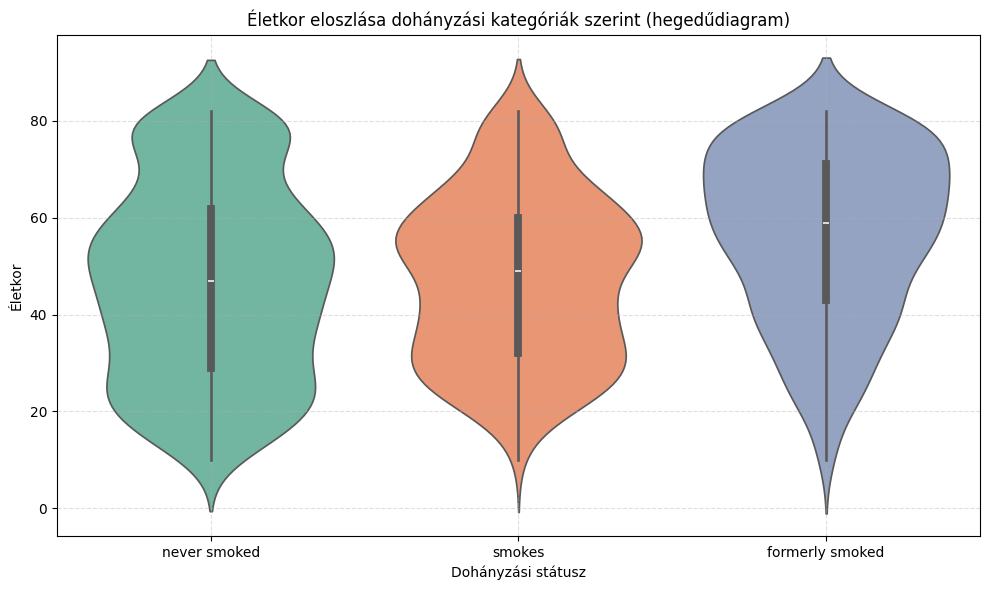

In [27]:
# 1. Csak azok, ahol nem NaN a smoking_status és age
df_violin = sampled_data[['smoking_status', 'age']].dropna()

# 2. Hegedűdiagram készítése
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df_violin,
    x='smoking_status',
    y='age',
    hue='smoking_status',
    palette='Set2'
)

plt.title('Életkor eloszlása dohányzási kategóriák szerint (hegedűdiagram)')
plt.xlabel('Dohányzási státusz')
plt.ylabel('Életkor')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# 2.10 feladat
- Trend figyelhető meg az életkor <-> BMI <-> vércukorszint között, a fiatalabb személyek esetén jóval kisebb a BMI és vércukorszint párosítás. 
- Továbbá a BMI láthatóan növekedik az életkor növekedésével. 
- Nem figyelhető meg egyértelmű trendszerűség a vércukorszint és a BMI között

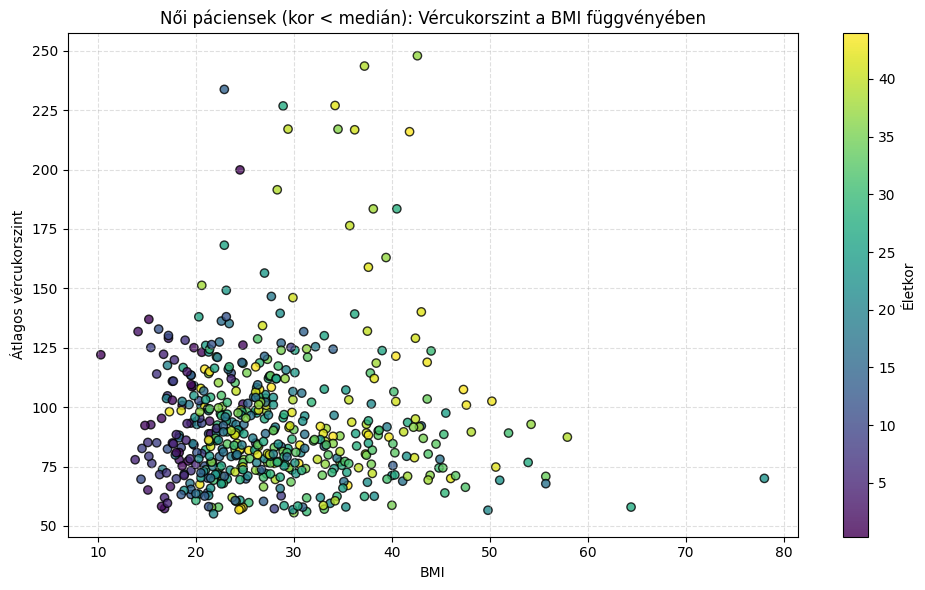

In [28]:
# 1. Medián életkor meghatározása
age_median = sampled_data['age'].median()

# 2. Szűrés
df_scatter = sampled_data[
    (sampled_data['gender'] == 'Female') & (sampled_data['age'] < age_median)
][['bmi', 'avg_glucose_level', 'age']].dropna()

# 3. Scatter plot színskálával
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=df_scatter['bmi'],
    y=df_scatter['avg_glucose_level'],
    c=df_scatter['age'],          # színezés az életkor alapján
    cmap='viridis',               # folyamatos színskála
    alpha=0.8,
    edgecolor='k'
)

# 4. Colorbar és tengelycímkék
cbar = plt.colorbar(scatter)
cbar.set_label('Életkor')

plt.xlabel('BMI')
plt.ylabel('Átlagos vércukorszint')
plt.title('Női páciensek (kor < medián): Vércukorszint a BMI függvényében')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# 2.11 feladat

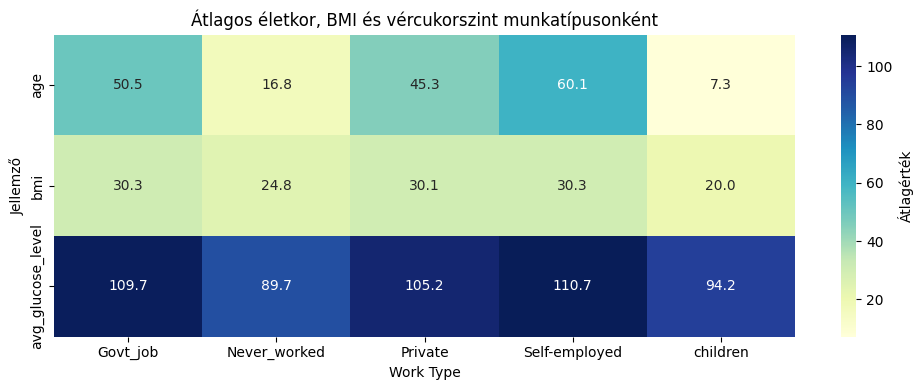

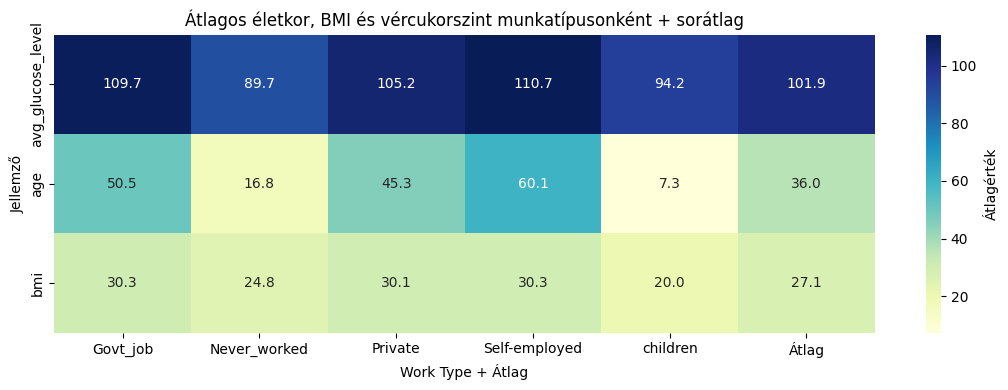

Sikeresen elmentve: LKYEOR_python_adat.xlsx (munkafüzet: LKYEOR)


In [29]:
# 1. Kiválasztott jellemzők
cols = ['work_type', 'age', 'bmi', 'avg_glucose_level']
df_avg = sampled_data[cols].dropna()

# 2. Csoportosítás és átlagok számítása
pivot_df = df_avg.groupby('work_type')[['age', 'bmi', 'avg_glucose_level']].mean().T

# 3. Heatmap kirajzolása
plt.figure(figsize=(10, 4))
sns.heatmap(
    pivot_df,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu",
    cbar_kws={'label': 'Átlagérték'}
)

plt.title("Átlagos életkor, BMI és vércukorszint munkatípusonként")
plt.ylabel('Jellemző')
plt.xlabel('Work Type')
plt.tight_layout()
plt.show()

# Ugyanaz az előkészítés, mint 2.11-ben
cols = ['work_type', 'age', 'bmi', 'avg_glucose_level']
df_avg = sampled_data[cols].dropna()

pivot_df = df_avg.groupby('work_type')[['age', 'bmi', 'avg_glucose_level']].mean().T

# ÚJ: soronkénti átlag kiszámítása
pivot_df['Átlag'] = pivot_df.mean(axis=1)
pivot_sorted = pivot_df.sort_values(by='Átlag', ascending=False)

# Heatmap rajzolása
plt.figure(figsize=(11, 4))
sns.heatmap(
    pivot_sorted,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu",
    cbar_kws={'label': 'Átlagérték'}
)

plt.title("Átlagos életkor, BMI és vércukorszint munkatípusonként + sorátlag")
plt.ylabel('Jellemző')
plt.xlabel('Work Type + Átlag')
plt.tight_layout()
plt.show()

#Excel fájl mentése
fajlnev = f"{Neptun_kód}_python_adat.xlsx"

pivot_sorted.to_excel(fajlnev, sheet_name=Neptun_kód)

print(f"Sikeresen elmentve: {fajlnev} (munkafüzet: {Neptun_kód})")